# CSE 251B Programming assignment

## Logistic Regression

### Evaluate the model on Convertible vs Minivan using the resized dataset

Car types: ['Convertible', 'Minivan', 'Pickup', 'Sedan'] 

Convertible: 149 # of images
Minivan: 148 # of images
Pickup: 150 # of images
Sedan: 150 # of images
The test set loss and accuracy is 0.467870 and 0.83


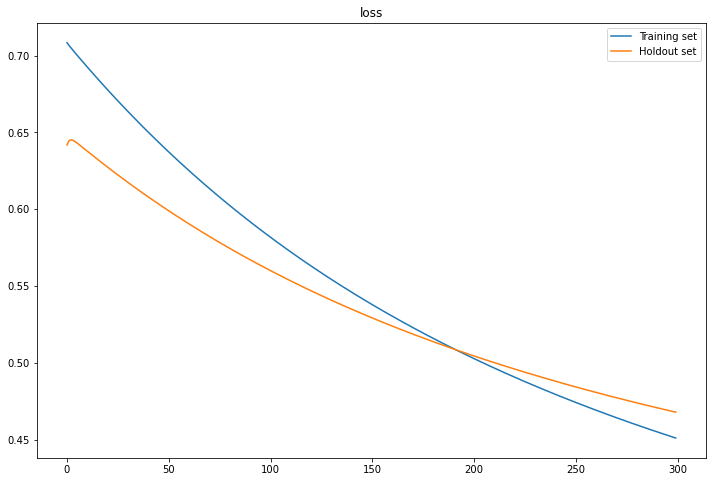

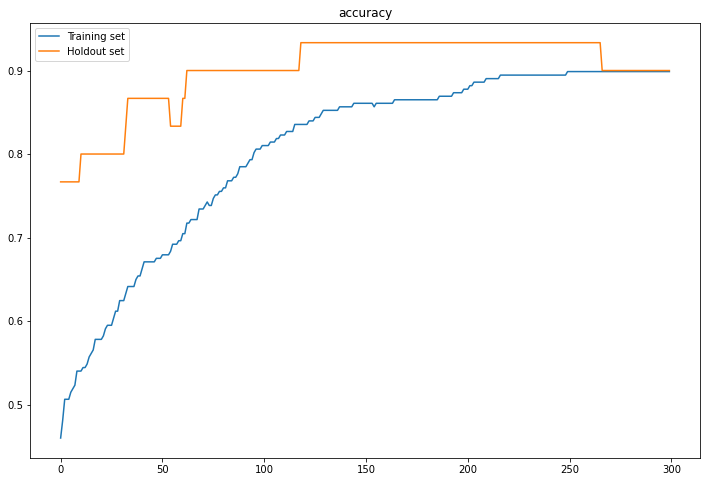

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataloader import load_data
from cross_validation import CrossValidationDataset
from PCA import PCA
from logistic_regression import LogisticRegression
from utils import accuracy_01, plot

plt.rcParams["figure.figsize"] = (12, 8)


dataset = CrossValidationDataset(load_data('./aligned/')[0], ['Convertible', 'Minivan'], 10)

train_loss_record = []
train_accuracy_record = []

holdout_loss_record = []
holdout_accuracy_record = []

for k, (train_data, train_labels, test_data, test_labels, holdout_data, holdout_labels) in enumerate(dataset.data()):
    n_components = 40

    pca = PCA(train_data, n_components)

    train_data = pca.apply(train_data)
    test_data = pca.apply(test_data)
    holdout_data = pca.apply(holdout_data)

    logistic = LogisticRegression(n_components)

    train_loss_record.append([])
    train_accuracy_record.append([])

    holdout_loss_record.append([])
    holdout_accuracy_record.append([])
    best_accuracy = 0
    best_w = logistic.w 
    for epoch in range(300):
        train_y = logistic.forward(train_data)
        train_loss = logistic.loss(train_y, train_labels)
        train_accuracy = accuracy_01(train_y, train_labels)
        train_loss_record[k].append(train_loss)
        train_accuracy_record[k].append(train_accuracy)

        holdout_y = logistic.forward(holdout_data)
        holdout_loss = logistic.loss(holdout_y, holdout_labels)
        holdout_accuracy = accuracy_01(holdout_y, holdout_labels)
        holdout_loss_record[k].append(holdout_loss)
        holdout_accuracy_record[k].append(holdout_accuracy)
        
        # record the parameters when best accuracy occurs
        if holdout_accuracy > best_accuracy:
            best_w = logistic.w
            best_accuracy = holdout_accuracy
        
        
        logistic.backward(train_data, train_y, train_labels)
    
    break

logistic.w = best_w
test_y = logistic.forward(test_data)
test_loss = logistic.loss(holdout_y, holdout_labels)
test_accuracy = accuracy_01(test_y, test_labels)
print('The test set loss and accuracy is {:2f} and {:.2f}'.format(test_loss, test_accuracy))


plot('loss', train_loss_record[0], holdout_loss_record[0])
plot('accuracy', train_accuracy_record[0], holdout_accuracy_record[0])